# Logistic Regression
An example of the steps for binary classification with logistic regression.

The provided data from an SUV dataset describe whether or not a certain customer purchased an SUV.

## 1. Library Imports and Data Loading

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("data/suv.csv")

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df[["Age", "EstimatedSalary"]].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [6]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

## 2. Feature Selection

### 2.1. Correlation

<Axes: >

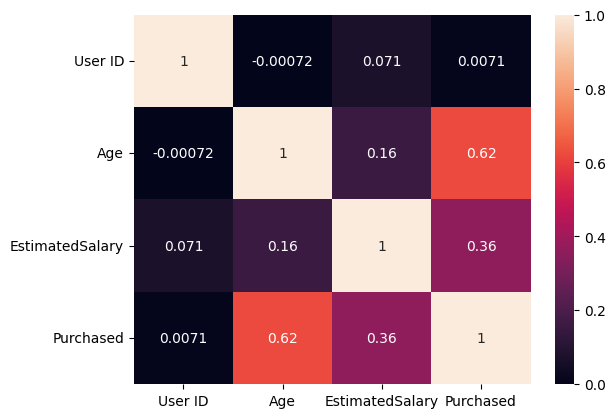

In [7]:
numeric = df.select_dtypes("number")
cor = numeric.corr()
sns.heatmap(cor, annot=True)

Based off of the correlation matrix, we will use Age and EstimatedSalary to predict whether or not an SUV will be purchased.

## 3. Building our Model

In [8]:
# Extract Data
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

## 4. Evaluating our Model

In [9]:
# Make predictiosn using the test data
y_pred = model.predict(X_test)


Text(50.722222222222214, 0.5, 'Actual')

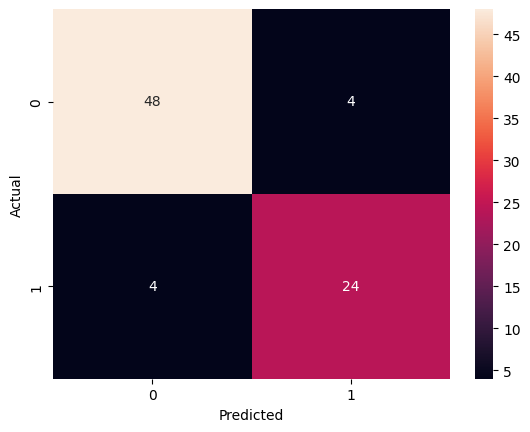

In [10]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

## 5. Making New Predictions

In [14]:
# TODO: Take user input to make a prediction
# You can get user input with the input("Prompt") function
# this function will always return a String, so you may have to 
# cast it to an int

age = 0
salary = 0

while salary <= 0 or type(salary) != int:
    try:
        salary = int(input("What is your annual salary: "))
        if salary <= 0:
            print("Please enter a valid number")
    except:
        print("Please enter a valid number")

while age <= 0 or type(age) != int:
    try:
        age = int(input("What is your age: "))
        if age <= 0:
            print("Please enter a valid age")
    except:
        print("Please enter a valid age")

predictions = model.predict([[age, salary]])
if predictions[0] == 0:
    print("We have predicted you wont buy a car.")
else:
    print("We have predicted you will buy a car.")

We have predicted you will buy a car.


/Users/thinkalex/Desktop/ATCS-2023/Examples/Unit06/LogisticRegression/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
